**Harsha Somaya**

Spring 2022

CS 25X: Data Analysis and Visualization

# Lab 2: Matrix Transformations, Numpy and MatPlotLib
## Task 1: Setup, data import and projection

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [2]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [12,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

/tmp/ipykernel_2062/50590617.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/tmp/ipykernel_2062/50590617.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


### 1b) Projection
1. Read the toy dataset in 'data/gauss_3d.csv' using genfromtxt into a numpy matrix with 3 columns (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Create a figure with 3 subplots, one for every possible combination of the dataset's dimensions (X vs Y, Y vs Z, and Z vs X). Each of these plots shows a different 2D __projection__ of the 3D dataset (each column is a different dimension). 
  - Remember pyplot? [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) 
  - Remember subplots?  [pyplot.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) 
  
3. Make sure each subplot has a title

Text(0.5, 1.0, 'Graph of x vs. z')

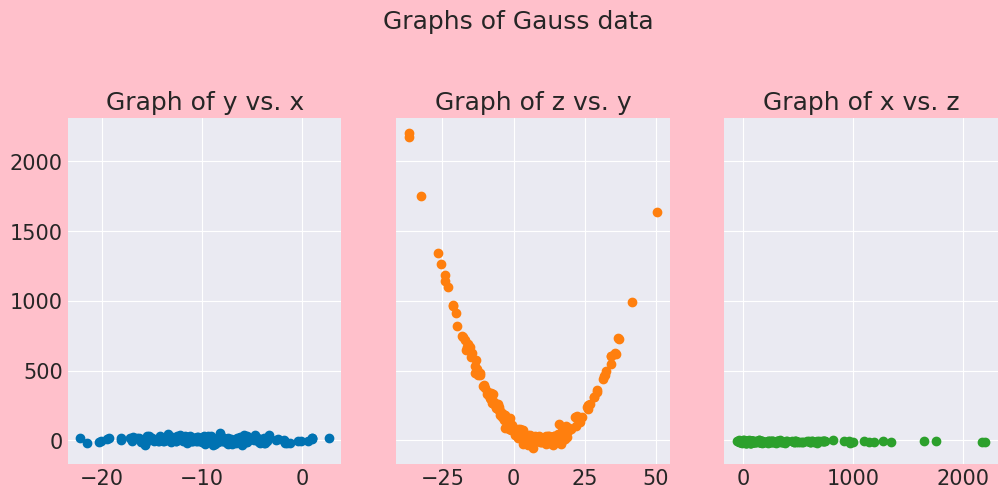

In [3]:
file1=np.genfromtxt ('data/gauss_3d.csv', delimiter=",")   
numberVariables=file1.shape[1]
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',facecolor="pink")
fig.suptitle("Graphs of Gauss data", y=1.12)
x=file1[:,0]
y=file1[:,1]
z=file1[:,2]
axs[0].scatter(x, y)
axs[0].set_title('Graph of y vs. x')
axs[1].scatter(y, z, color='tab:orange')
axs[ 1].set_title('Graph of z vs. y')
axs[2].scatter(z, x, color='tab:green')
axs[2].set_title('Graph of x vs. z')


### 1c) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [4]:
print(file1.shape)
oneArray=np.ones((file1.shape[0],1)) 
combined=np.hstack((file1,oneArray))
print(combined)
print(combined.shape)



(200, 3)
[[  -1.878   -1.013   73.627    1.   ]
 [ -13.059   17.36    41.08     1.   ]
 [ -12.641   -3.435  174.669    1.   ]
 [ -15.365   34.323  607.439    1.   ]
 [  -5.673  -14.979  598.393    1.   ]
 [ -21.508  -21.41   973.77     1.   ]
 [  -1.276  -19.761  817.145    1.   ]
 [ -13.806   -8.358  301.274    1.   ]
 [  -8.405  -11.787  470.952    1.   ]
 [ -11.247   34.341  605.098    1.   ]
 [  -2.689    0.103   75.917    1.   ]
 [ -20.301  -15.14   668.435    1.   ]
 [ -11.612   21.716  166.265    1.   ]
 [ -11.92    -3.798  173.865    1.   ]
 [  -4.331  -13.553  479.397    1.   ]
 [ -15.499   18.138    6.781    1.   ]
 [ -10.862   14.35   -15.52     1.   ]
 [ -14.389   -1.524  145.707    1.   ]
 [  -9.789   26.113  252.389    1.   ]
 [  -7.086    6.937  -57.971    1.   ]
 [ -15.503   29.254  350.007    1.   ]
 [  -4.276   12.541   31.791    1.   ]
 [  -5.492   28.382  313.531    1.   ]
 [  -7.488    6.641  -22.467    1.   ]
 [  -5.496  -13.296  579.077    1.   ]
 [ -13.419   41.

## Task 2: Translation

### 2a) Create the Translation Matrix

<img src="img/Translation-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that translates the dataset
  - +25 units in the Y direction  (t<sub>y</sub>)
  - -1000 units in the Z direction (t<sub>z</sub>)
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print your matrix


In [36]:
translationMatrix=np.eye(4)
print(translationMatrix, "\n")
translationMatrix[1,3]=25
translationMatrix[2,3]=-1000
print(translationMatrix)



[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

[[    1.     0.     0.     0.]
 [    0.     1.     0.    25.]
 [    0.     0.     1. -1000.]
 [    0.     0.     0.     1.]]


### 2b) Translate Data and Visualize Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and translated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the translated data in different colors.
  - <i>You can implement this as a function. You'll be repeating this visualization with different transformation matrices.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

(4, 200)
[[  -1.878   23.987 -926.373    1.   ]
 [ -13.059   42.36  -958.92     1.   ]
 [ -12.641   21.565 -825.331    1.   ]
 [ -15.365   59.323 -392.561    1.   ]
 [  -5.673   10.021 -401.607    1.   ]
 [ -21.508    3.59   -26.23     1.   ]]


(<Figure size 1200x450 with 3 Axes>,
 array([<AxesSubplot: title={'center': 'Graph of y vs. x'}>,
        <AxesSubplot: title={'center': 'Graph of z vs. y'}>,
        <AxesSubplot: title={'center': 'Graph of x vs. z'}>], dtype=object))

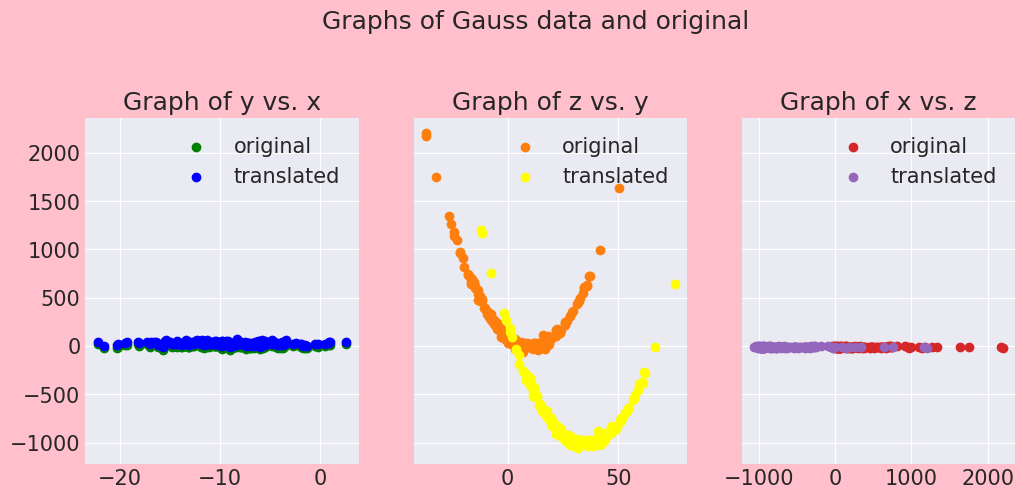

In [37]:
def transformations(translation=translationMatrix):
    newmatrix=(translation@(combined.T)).T #(4,4) * (200,4)= (4,4) * (4,200)= (4,200)=(200,4)
    print(combined.T.shape)
    print(newmatrix[:6])

    fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',facecolor="pink")
    fig.suptitle("Graphs of Gauss data and original", y=1.12)

    #orginal
    x=file1[:,0]
    y=file1[:,1]
    z=file1[:,2]
    axs[0].scatter(x, y, color="green", label="original")
    axs[0].set_title('Graph of y vs. x')

    axs[1].scatter(y, z, color='tab:orange',label="original")
    axs[ 1].set_title('Graph of z vs. y')

    axs[2].scatter(z, x, color='tab:red', label="original")
    axs[2].set_title('Graph of x vs. z')
    # print(newmatrix[:5])
    #transofrmed
    x=newmatrix[:,0]
    y=newmatrix[:,1]
    z=newmatrix[:,2]
    axs[0].scatter(x, y, color="blue",label="translated")

    axs[1].scatter(y, z, color="yellow",label="translated")

    axs[2].scatter(z, x, color="tab:purple",label="translated")
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    return fig, axs
transformations()

# line1=plt.plot(x, x**1,color="green",label="1")
# line2=plt.plot(x, x**2,color="red",label="2")
# line3=plt.plot(x, x**3,color="blue",label="3")




## Task 3: Scale

### 3a) Create a Scaling Matrix

<img src="img/Scaling-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that scales the dataset
  - by 3 in the X axis
  - by 0.1 in the Z axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print the matrix

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

[[3.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  1. ]]
(4, 200)
[[ -5.634   -1.013    7.3627   1.    ]
 [-39.177   17.36     4.108    1.    ]
 [-37.923   -3.435   17.4669   1.    ]
 [-46.095   34.323   60.7439   1.    ]
 [-17.019  -14.979   59.8393   1.    ]
 [-64.524  -21.41    97.377    1.    ]]


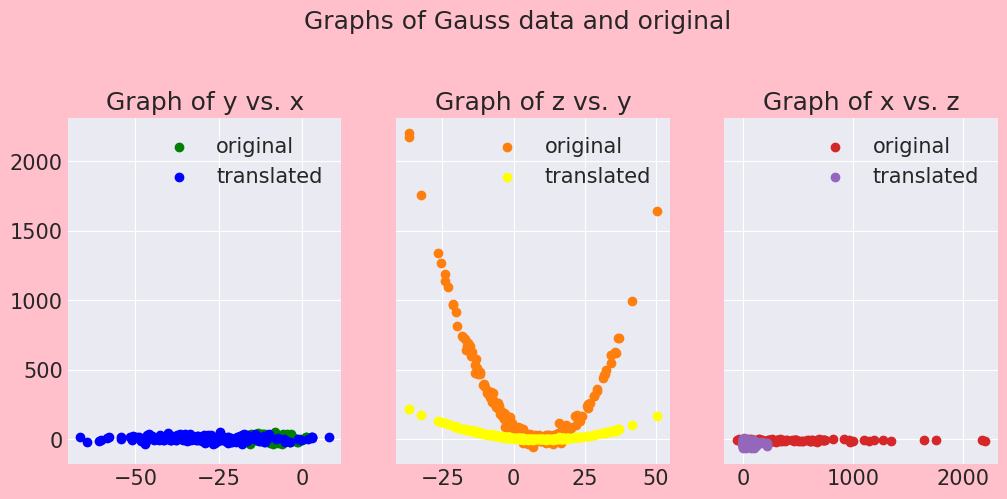

In [39]:
transformation=np.eye(4)
print(transformation, "\n")
transformation[0,0]=3
transformation[2,2]=0.1
print(transformation)



### 3b) Scale Data and Visualize the Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and scaled results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the scaled data in different colors.
  - <i>If you implemented a function in the previous step, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

(4, 200)
[[ -5.634   -1.013    7.3627   1.    ]
 [-39.177   17.36     4.108    1.    ]
 [-37.923   -3.435   17.4669   1.    ]
 [-46.095   34.323   60.7439   1.    ]
 [-17.019  -14.979   59.8393   1.    ]
 [-64.524  -21.41    97.377    1.    ]]


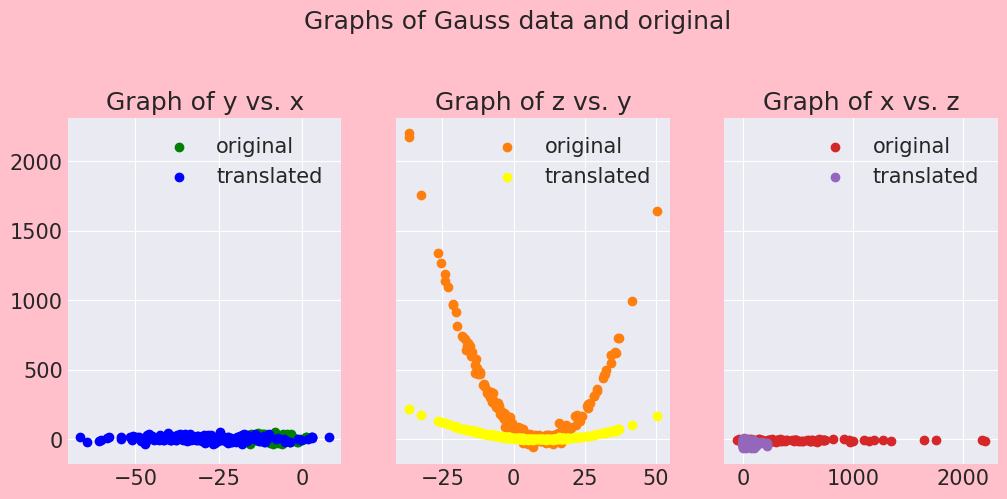

In [40]:
transformations(transformation);
